In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib notebook

# Intel·ligència Artificial contra Malaltia Minoritària Complexa: Qui guanyarà? La complexitat de la malaltia o els tecnòlegs?

---
#### Laura Cabayol, Leonardo González, Axel M. PdL, Jan Ollé 

---
En aquest repte teníem dades de 39 pacients organitzades en 2 sets de dades. D'una banda, un llistat de dades clíniques i de l'altra dades genètiques.


<span style="color:blue">
Degut a la confidencialitat d'aquest tipus de dades, aquestes estaven codificades. Això vol dir que a l'hora de presentar resultats utilitzarem noms en clau per referir-nos a la diversitat de variables del set de dades. Tampoc té massa sentit penjar els detalls del codi que hem fet servir perquè sense els fitxers que contenen les dades el codi en si és estèril. Ens limitarem a explicar què hem fet i a quins resultats hem arribat.
</span>.

---
L'hemofília és una malaltia genètica que impedeix la correcta coagulació de la sang. Se sap que n'hi ha de dos tipus: A, quan hi ha un dèficit del factor VII de coagulació; i B, quan hi ha un dèficit del factor IX. També se sap que està relacionada amb el cromosoma X en tots dos casos, amb lo qual afecta principalment a varons de més de 50 anys. Essent una malaltía minoritària, afecta a un de cada 10 000 varons vius en el cas A i a un de cada 32 000 varons vius en el cas B.

Font: https://es.wikipedia.org/wiki/Hemofilia

## El nostre enfocament

Degut a disposar d'un nombre molt més gran de dades genètiques, a més de ser l'hemofília una malaltia genètica, hem decidit treballar només amb aquestes.

Per cada pacient disposàvem dels gens mutats del seu exoma, junt amb quin tipus de mutacions presentava cadascun d'aquests gens. Això són uns 20 000 gens per pacient amb les seves corresponents mutacions. Crucialment, també sabíem si aquestes mutacions eren rares (les tenen menys de l'1% de la població) o comuns (les tenen més de l'1% de la població).

La nostra estratègia ha sigut tractar aquesta base de dades per trobar un llistat de mutacions que fossin rares i que estiguessin presents en tots els pacients.

D'aquests pacients, en la gran majoria d'ells l'hemofília que es manifestava era de tipus "F" i la resta de tipus "G". És important tractar tant els dos grups en conjunt com per separat, donat que encara que es tracti d'hemofília en els dos casos, el fet que tinguem dues variants de la malaltia pot fer que hi hagi mutacions presents en un grup però no en l'altre.

Aquest filtrament de dades ha retornat una llista amb un nombre de mutacions de l'ordre de vàries desenes. Sobre aquest primer filtrament cal anar amb compte amb possibles falsos positius deguts a limitacions en la tècnica amb què es mesuren aquests paràmetres. Un primer criteri per detectar falsos positius ha sigut mirar en si el tipus de mutació que presentava cada pacient era homozigota o heterozigota. Així, hem descartat mutacions que o només éren homozigotes o només heterozigotes.

Hem fet servir el llenguatge de programació Python amb l'ajut dels paquets numpy i pandas pel tractament d'aquesta base de dades.

---
## Resultats

Hem sigut capaços d'identificar 13 mutacions úniques corresponents a 10 gens únics presents en un mínim de 30 dels 39 pacients, sense fer distinció entre tipus de malaltia. D'aquestes 13 mutacions, és interessant veure que 3 d'aquestes es corresponen a un únic gen, tenint també 2 mutacions corresponents a un altre únic gen. Les restants mutacions es corresponien cadascuna a un gen diferent.

D'altra banda, també hem pogut identificar una mutació corresponent a un gen no present en la llista anterior que tots els pacients amb hemofília de tipus "G" posseeixen.

Per últim, hem identificat una mutació en un gen en tots els pacients que han desenvolupat càncer i que poc més de la meitat dels altres pacients sense càncer també tenen. Aquesta mutació pot arribar a ser rellevant per diagnosticar futurs càncers en aquests tipus de pacients. Cal prendre aquestes paraules amb cautela, però. S'han de fer molts més anàlisis per poder arribar a extreure una conclusió com aquesta.

Fent servir els noms en codi per les mutacions i els gens que ens han sigut donats, presentem a continuació una llista d'aquestes mutacions i corresponents gens que hem identificat.

---
Aquests són els resultats per les mutacions i gens presents en almenys 30 dels 39 pacients:

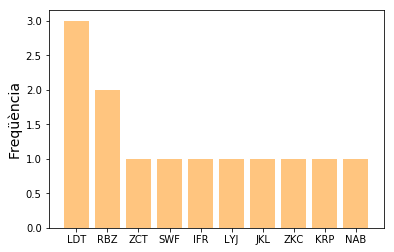

In [10]:
mutacions_minim_30_pacients = ['RYUG','HHVG','ZXYF','ELHX','WUEC','QHSV',
                                        'VORJ','HUAJ','GTHK','ICST','GMIC','PCNA','DVSO']

gens_minim_30_pacients = ['LDT','RBZ','ZCT','SWF','IFR','LYJ',
                                          'JKL','ZKC','KRP','NAB']

freq_gens_minim_30_pacients = {u'LDT': 3, u'RBZ': 2, u'ZCT': 1, u'SWF': 1, u'IFR': 1,
                               u'LYJ': 1, u'JKL': 1, u'ZKC': 1, u'KRP': 1, u'NAB': 1}

plt.bar(range(len(freq_gens_minim_30_pacients)), 
        list(freq_gens_minim_30_pacients.values()), align='center',
        color = 'darkorange', alpha = 0.5)
plt.xticks(range(len(freq_gens_minim_30_pacients)), list(freq_gens_minim_30_pacients.keys()))
plt.ylabel('Freqüència', fontsize = 14)
plt.show()

---
Aquesta és la mutació i el gen corresponent que hem identificat per la malaltia de tipus "G":

In [11]:
mutacio_G = 'OJJV'
gen_G = 'FUZ'

---
Ja per últim, la mutació i gen associada al desenvolupament de càncer en aquests pacients és la següent:

In [12]:
mutacio_cancer = 'QGUP'
gen_cancer = 'RES'

---
## Conclusions

Mitjançant una inspecció del set de dades proporcionats hem sigut capaços de trobar mutacions rares que correlacionen amb característiques dels pacients.

D'una banda, hem trobat 13 mutacions corresponents a 10 gens presents en almenys 30 dels 39 pacients. 

De l'altra, una mutació associada a un gen diferent dels 10 anteriors que tots els pacients amb hemofília tipus "G" tenen i que poc més de la meitat dels "F" tenen.

Per últim, també hem trobat una mutació diferent a totes les anteriors que tots els pacients que han desenvolupat càncer tenen al seu exoma, i que poc més de la meitat dels pacients que no han desenvolupat càncer també tenen.

Possibles direccions de futur treball en aquest projecte serien, primer, comprovar si aquests gens i mutacions han sigut estudiats amb anterioritat i poder determinar fins a quin punt han sigut identificats com a falsos positius. D'altra banda, un cop eliminades totes les dades irrellevants de la bases de dades seria interessant construir una base de dades "depurades" junt amb variables d'una població "sana" de control per fer-ne un anàlisi estadístic per extreure conclusions quantitatives més fortes.